In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 

In [2]:
data=pd.read_csv('/kaggle/input/london-bike-sharing-dataset/london_merged.csv')

In [3]:
data.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


In [4]:
data.shape

(17414, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


In [7]:
data.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [8]:
data['timestamp']=pd.to_datetime(data['timestamp'])

In [9]:
data['year']=data['timestamp'].dt.year

In [10]:
data['month']=data['timestamp'].dt.month

In [11]:
data['dayofweek']=data['timestamp'].dt.dayofweek

In [12]:
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6


In [13]:
data['season'].value_counts(ascending=False)

season
0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: count, dtype: int64

In [14]:
data['is_weekend'].value_counts(ascending=False)

is_weekend
0.0    12444
1.0     4970
Name: count, dtype: int64

In [15]:
data['weather_code'].value_counts(ascending=False)

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

In [16]:
# 이상치 제거 함수
def remove_outliers_iqr(data,column,factor=1.5):
    df=data.copy()
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-(factor*IQR)
    upper_bound=Q3+(factor*IQR)
    df=df[(df[column]>=lower_bound)&(df[column]<=upper_bound)]
    return df

In [17]:
cleaned_data=remove_outliers_iqr(data,'t1',1.5)
print('원본 데이터 형태:',data.shape)
print('t1 컬럼의 원본 형태:')
print(data['t1'].describe())
print('이상치 제거 후 데이터 형태:',cleaned_data.shape)
print('t1 컬럼의 이상치 제거 후 통계')
print(cleaned_data['t1'].describe())

원본 데이터 형태: (17414, 13)
t1 컬럼의 원본 형태:
count    17414.000000
mean        12.468091
std          5.571818
min         -1.500000
25%          8.000000
50%         12.500000
75%         16.000000
max         34.000000
Name: t1, dtype: float64
이상치 제거 후 데이터 형태: (17350, 13)
t1 컬럼의 이상치 제거 후 통계
count    17350.000000
mean        12.401547
std          5.472159
min         -1.500000
25%          8.000000
50%         12.500000
75%         16.000000
max         28.000000
Name: t1, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


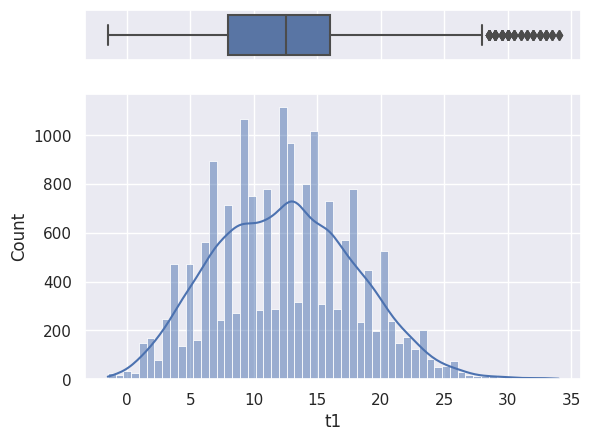

In [18]:
# 이상치 제거 전
sns.set(style='darkgrid')
f,(ax_box,ax_hist)=plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=data,x='t1',ax=ax_box)
sns.histplot(data=data,x='t1',ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


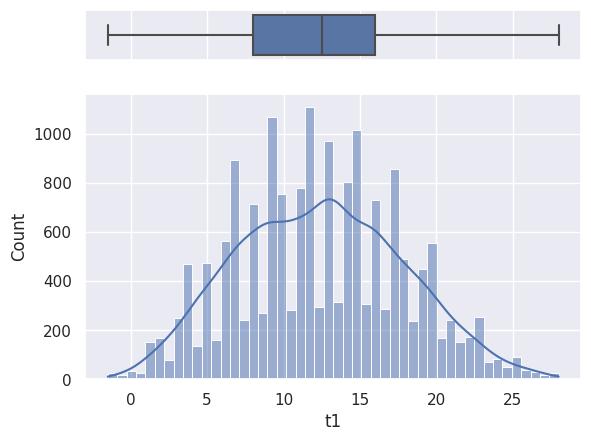

25%:8.0
중앙값:12.5
75%:16.0


In [19]:
# 이상치 제거 후 
sns.set(style='darkgrid')
f,(ax_box,ax_hist)=plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cleaned_data,x='t1',ax=ax_box)
sns.histplot(data=cleaned_data,x='t1',ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()
q1=cleaned_data.t1.quantile(0.25)
q3=cleaned_data.t1.quantile(0.75)
median=cleaned_data.t1.median()
print(f'25%:{q1}')
print(f'중앙값:{median}')
print(f'75%:{q3}')

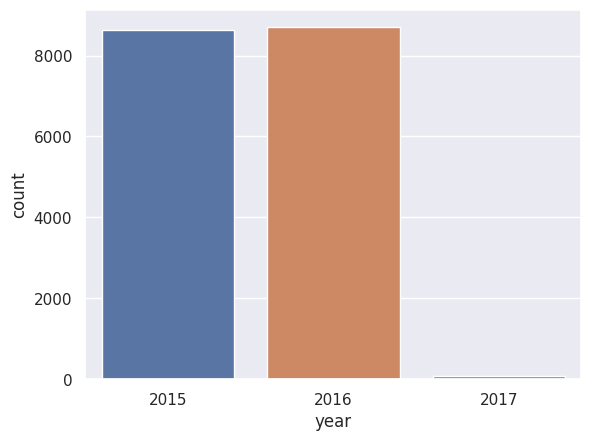

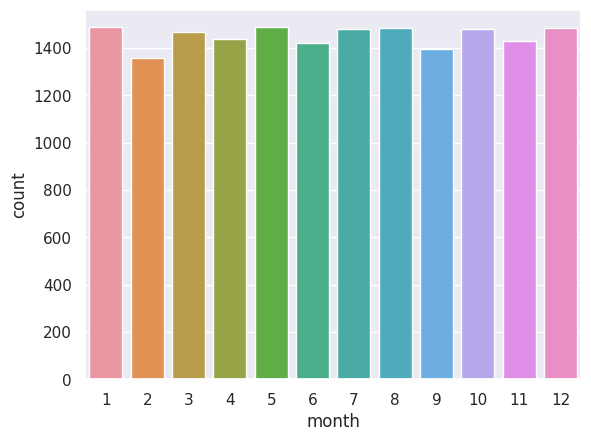

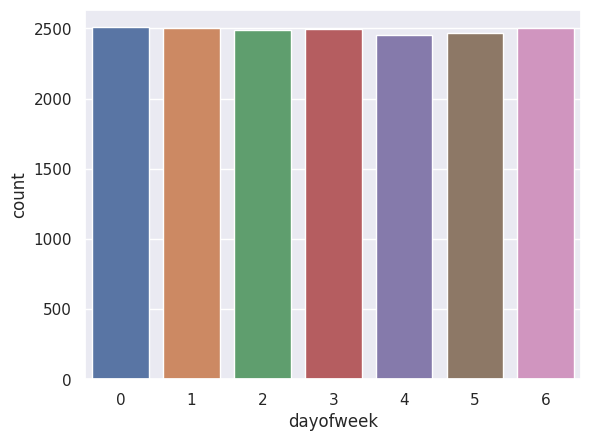

In [20]:
# 바차트
# 년도별 사용량 확인
sns.countplot(data=data,x='year')
plt.show()
# 월별 사용량 확인
sns.countplot(data=data,x='month')
plt.show()
# 요일별 사용량 확인 
sns.countplot(data=data,x='dayofweek')
plt.show()

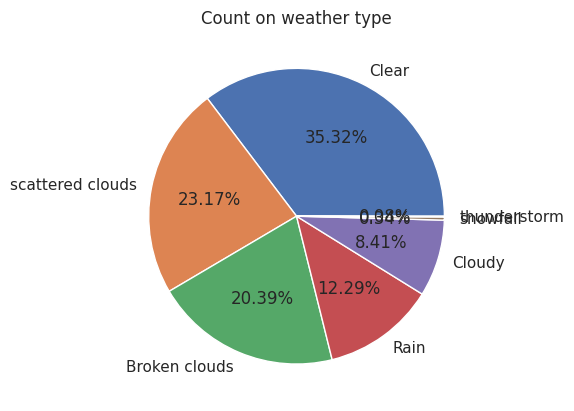

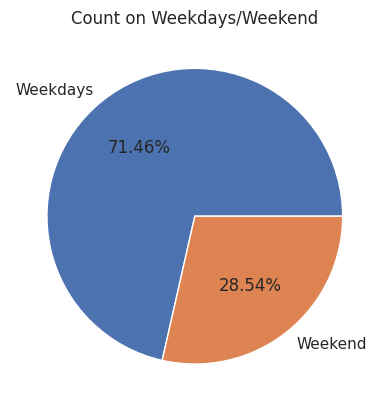

In [21]:
# pie chart
# 날씨 타입에 따른 사용량 파이트트
type_value_count=data['weather_code'].value_counts(normalize=True)*100
plt.pie(type_value_count,labels=['Clear','scattered clouds','Broken clouds','Rain','Cloudy','snowfall','thunderstorm'],autopct='%1.2f%%')
plt.title('Count on weather type')
plt.show()

# 주중/주말에 따른 파이차트
type_value_count=data['is_weekend'].value_counts(normalize=True)*100
plt.pie(type_value_count,labels=['Weekdays','Weekend'],autopct='%1.2f%%')
plt.title('Count on Weekdays/Weekend')
plt.show()

=== 1. 시간대별 자전거 사용량 분석 ===


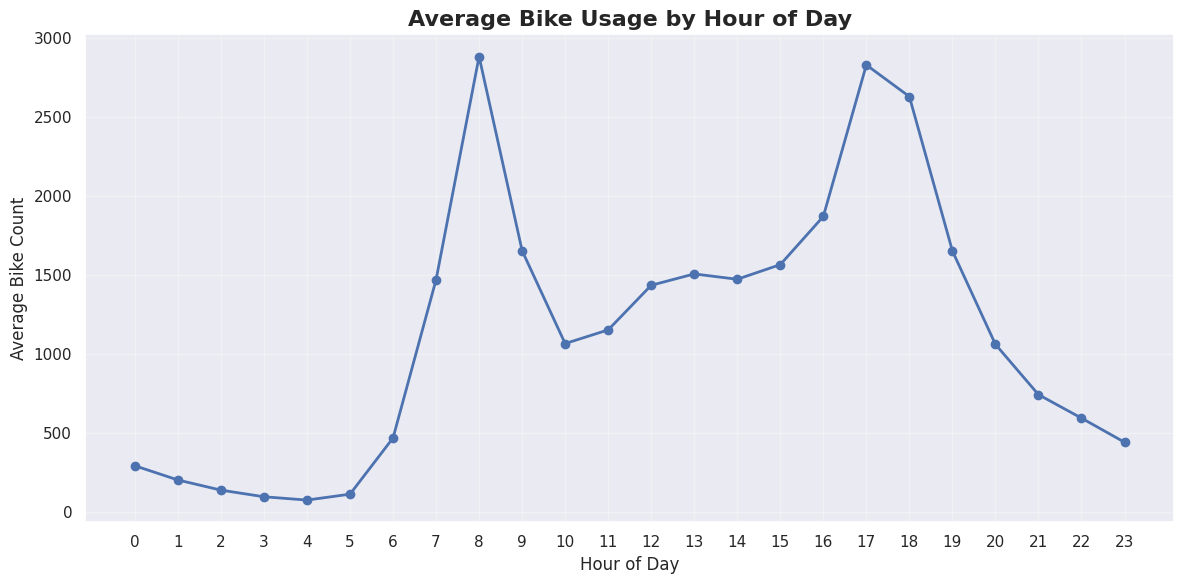

최대 사용량 시간대: 8시 (2882.8대)
최소 사용량 시간대: 4시 (73.3대)


In [22]:
# 추가 분석 1
# 1. 시간대별 자전거 사용량 시각화 (Line Plot)
print("=== 1. 시간대별 자전거 사용량 분석 ===")
# 시간 추출
data['hour'] = data['timestamp'].dt.hour

# 시간대별 평균 사용량 계산
hourly_usage = data.groupby('hour')['cnt'].mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_usage.index, hourly_usage.values, marker='o', linewidth=2, markersize=6)
plt.title('Average Bike Usage by Hour of Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Bike Count', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

print(f"최대 사용량 시간대: {hourly_usage.idxmax()}시 ({hourly_usage.max():.1f}대)")
print(f"최소 사용량 시간대: {hourly_usage.idxmin()}시 ({hourly_usage.min():.1f}대)")


=== 2. 온도와 자전거 사용량 관계 분석 ===


<Figure size 1200x800 with 0 Axes>

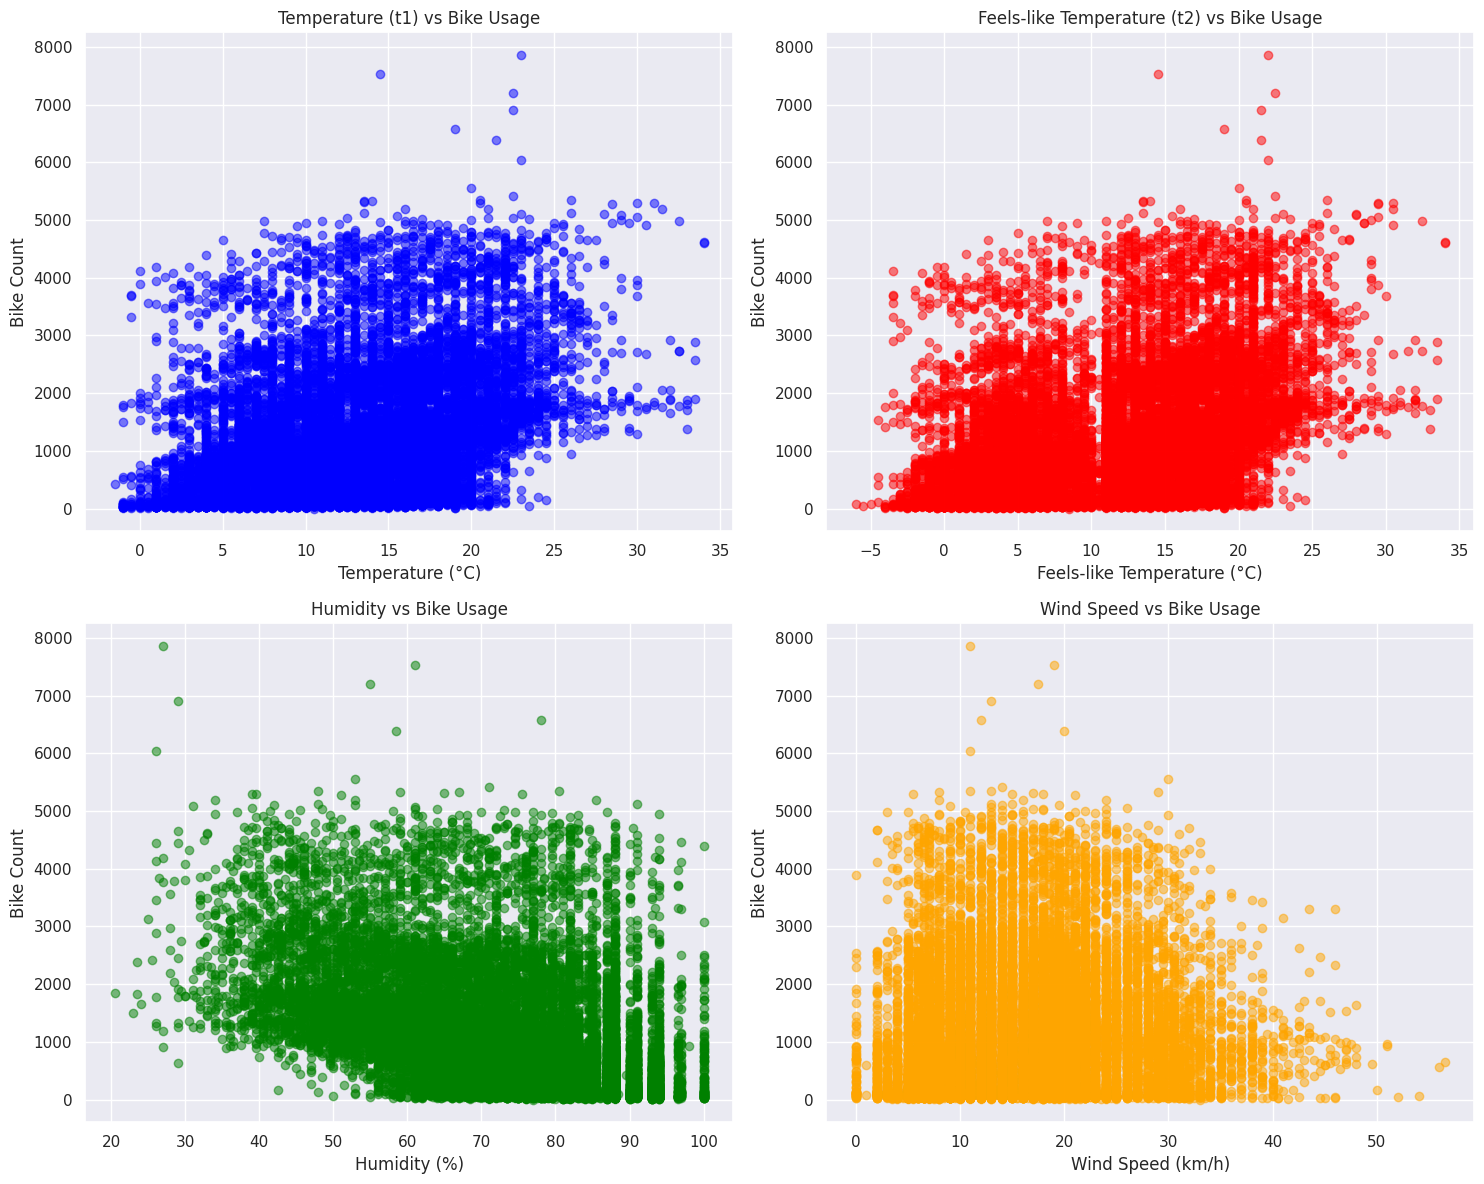

In [23]:
# 추가 분석 2
# 2. 온도와 자전거 사용량 간의 관계 (Scatter Plot)
print("\n=== 2. 온도와 자전거 사용량 관계 분석 ===")
plt.figure(figsize=(12, 8))

# 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# t1 (실제 온도)와 사용량
axes[0,0].scatter(data['t1'], data['cnt'], alpha=0.5, color='blue')
axes[0,0].set_title('Temperature (t1) vs Bike Usage')
axes[0,0].set_xlabel('Temperature (°C)')
axes[0,0].set_ylabel('Bike Count')

# t2 (체감 온도)와 사용량
axes[0,1].scatter(data['t2'], data['cnt'], alpha=0.5, color='red')
axes[0,1].set_title('Feels-like Temperature (t2) vs Bike Usage')
axes[0,1].set_xlabel('Feels-like Temperature (°C)')
axes[0,1].set_ylabel('Bike Count')

# 습도와 사용량
axes[1,0].scatter(data['hum'], data['cnt'], alpha=0.5, color='green')
axes[1,0].set_title('Humidity vs Bike Usage')
axes[1,0].set_xlabel('Humidity (%)')
axes[1,0].set_ylabel('Bike Count')

# 풍속과 사용량
axes[1,1].scatter(data['wind_speed'], data['cnt'], alpha=0.5, color='orange')
axes[1,1].set_title('Wind Speed vs Bike Usage')
axes[1,1].set_xlabel('Wind Speed (km/h)')
axes[1,1].set_ylabel('Bike Count')

plt.tight_layout()
plt.show()

In [24]:
# 추가 분석 3
# 상관관계 계산
correlations = data[['t1', 't2', 'hum', 'wind_speed', 'cnt']].corr()['cnt'].sort_values(ascending=False)
print("기상 변수와 자전거 사용량 간 상관관계:")
for var, corr in correlations.items():
    if var != 'cnt':
        print(f"{var}: {corr:.3f}")

기상 변수와 자전거 사용량 간 상관관계:
t1: 0.389
t2: 0.369
wind_speed: 0.116
hum: -0.463



=== 3. 변수 간 상관관계 히트맵 ===


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


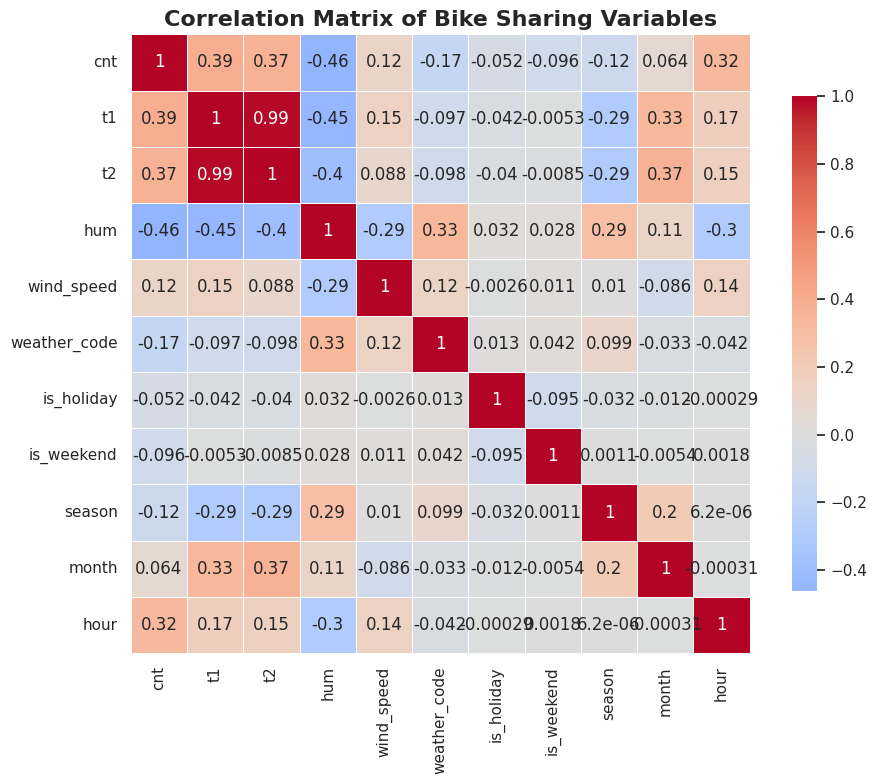

In [25]:
# 추가분석 4
# 4. 히트맵 (Correlation Matrix)
print("\n=== 3. 변수 간 상관관계 히트맵 ===")
plt.figure(figsize=(10, 8))
correlation_matrix = data[['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 
                          'is_holiday', 'is_weekend', 'season', 'month', 'hour']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Bike Sharing Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [26]:
# 데이터 분석을 통해 얻은 아이디어. 
"""
시간 패턴 분석

출퇴근 시간대(8시, 17시)에 뚜렷한 피크가 나타나며, 새벽 4시가 최저점입니다.
이는 통근용 교통수단으로서의 자전거 역할을 명확히 보여줍니다.

날씨의 영향

온도와 자전거 이용량이 양의 상관관계(0.39)를 보이며, 습도는 음의 상관관계(-0.46)를 나타냅니다.
맑은 날씨(35.3%)에서 가장 높은 이용률을 보이고, 비나 눈이 올 때는 이용량이 급감합니다.

계절성과 요일 패턴

주중(71.5%)이 주말보다 이용률이 높아 업무용 이동 수단임을 확인할 수 있습니다.
여름철과 가을철에 이용량이 증가하는 계절적 패턴이 뚜렷합니다.
"""

'\n시간 패턴 분석\n\n출퇴근 시간대(8시, 17시)에 뚜렷한 피크가 나타나며, 새벽 4시가 최저점입니다.\n이는 통근용 교통수단으로서의 자전거 역할을 명확히 보여줍니다.\n\n날씨의 영향\n\n온도와 자전거 이용량이 양의 상관관계(0.39)를 보이며, 습도는 음의 상관관계(-0.46)를 나타냅니다.\n맑은 날씨(35.3%)에서 가장 높은 이용률을 보이고, 비나 눈이 올 때는 이용량이 급감합니다.\n\n계절성과 요일 패턴\n\n주중(71.5%)이 주말보다 이용률이 높아 업무용 이동 수단임을 확인할 수 있습니다.\n여름철과 가을철에 이용량이 증가하는 계절적 패턴이 뚜렷합니다.\n'